In [4]:
#Importing the Libraries
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics


import matplotlib.pyplot as plt

%matplotlib inline
sns.set_palette("Greens_d")
# for Interactive Shells
from IPython.display import display
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go
import plotly.express as px
from yellowbrick.cluster import KElbowVisualizer

import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

In [5]:
Data = pd.read_csv('marketing_campaign.csv', sep="\t")

1) PRELIMINARY EDA AND FEATURE ENGINEERING

```
# This is formatted as code
```



In [6]:
Data

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
0            0  04-09-2012       58       635  ...                  7   
1            1  08-03-2014       38        11  ...                  5   
2            0  21-08-2013       26       426  ...                  4   
3            0  10-02-2014       26        11  ...                  6   
4            0  19-01-2014       94       173  ...                  5   
...        ...         ...      ...       ...  ...                ...   
2235         1  13-06-2013       46       709  ...                  5   
2236         1  10-06-2014       56       406  ...                  7   
2237         0  25-01-2014       91       908  ...                  6   
2238         1  24-01-2014        8       428  ...                  3   
2239         1  15-10-2012       40        84  ...                  7   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0                0             0             0             0             0   
1                0             0             0             0             0   
2                0             0             0             0             0   
3                0             0             0             0             0   
4                0             0             0             0             0   
...            ...           ...           ...           ...           ...   
2235             0             0             0             0             0   
2236             0             0             0             1             0   
2237             0             1             0             0             0   
2238             0             0             0             0             0   
2239             0             0             0             0             0   

      Complain  Z_CostContact  Z_Revenue  Response  
0            0              3         11         1  
1            0              3         11         0  
2            0              3         11         0  
3            0              3         11         0  
4            0              3         11         0  
...        ...            ...        ...       ...  
2235         0              3         11         0  
2236         0              3         11         0  
2237         0              3         11         0  
2238         0              3         11         0  
2239         0              3         11         1  

[2240 rows x 29 columns]

In [7]:
Data.info()
Data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

(2240, 29)

In [8]:
#To remove the NA values
Data = Data.dropna()
print("The total number of data-points after removing the rows with missing values are:", len(Data))

The total number of data-points after removing the rows with missing values are: 2216


In [9]:
Data.describe(include='number')

ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2216.000000  2216.000000    2216.000000  2216.000000  2216.000000   
mean    5588.353339  1968.820397   52247.251354     0.441787     0.505415   
std     3249.376275    11.985554   25173.076661     0.536896     0.544181   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2814.750000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8421.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2216.000000  2216.000000  2216.000000      2216.000000   
mean     49.012635   305.091606    26.356047       166.995939   
std      28.948352   337.327920    39.793917       224.283273   
min       0.000000     0.000000     0.000000         0.000000   
25%      24.000000    24.000000     2.000000        16.000000   
50%      49.000000   174.500000     8.000000        68.000000   
75%      74.000000   505.000000    33.000000       232.250000   
max      99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  ...  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
count      2216.000000  ...        2216.000000   2216.000000   2216.000000   
mean         37.637635  ...           5.319043      0.073556      0.074007   
std          54.752082  ...           2.425359      0.261106      0.261842   
min           0.000000  ...           0.000000      0.000000      0.000000   
25%           3.000000  ...           3.000000      0.000000      0.000000   
50%          12.000000  ...           6.000000      0.000000      0.000000   
75%          50.000000  ...           7.000000      0.000000      0.000000   
max         259.000000  ...          20.000000      1.000000      1.000000   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  \
count   2216.000000   2216.000000   2216.000000  2216.000000         2216.0   
mean       0.073105      0.064079      0.013538     0.009477            3.0   
std        0.260367      0.244950      0.115588     0.096907            0.0   
min        0.000000      0.000000      0.000000     0.000000            3.0   
25%        0.000000      0.000000      0.000000     0.000000            3.0   
50%        0.000000      0.000000      0.000000     0.000000            3.0   
75%        0.000000      0.000000      0.000000     0.000000            3.0   
max        1.000000      1.000000      1.000000     1.000000            3.0   

       Z_Revenue     Response  
count     2216.0  2216.000000  
mean        11.0     0.150271  
std          0.0     0.357417  
min         11.0     0.000000  
25%         11.0     0.000000  
50%         11.0     0.000000  
75%         11.0     0.000000  
max         11.0     1.000000  

[8 rows x 26 columns]

In [10]:
numCols = Data.select_dtypes("number").columns
catCols = Data.select_dtypes("object").columns
numCols= list(set(numCols))
catCols= list(set(catCols))

Data_num=Data[numCols]
Data_cat=Data[catCols]

pd.Series(list(map(set,Data_cat.values.T)),index=Data_cat.columns)

Marital_Status    {Absurd, Married, Alone, Together, YOLO, Singl...
Dt_Customer       {14-05-2013, 14-02-2013, 08-09-2012, 24-02-201...
Education                {Master, 2n Cycle, Graduation, PhD, Basic}
dtype: object

In [11]:
pd.Series(list(map(set,Data_num.values.T)),index=Data_num.columns)

AcceptedCmp1                                                  {0.0, 1.0}
NumDealsPurchases      {0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...
NumWebVisitsMonth      {0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...
MntSweetProducts       {0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...
AcceptedCmp2                                                  {0.0, 1.0}
AcceptedCmp4                                                  {0.0, 1.0}
MntGoldProds           {0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...
Complain                                                      {0.0, 1.0}
Income                 {49154.0, 49160.0, 81929.0, 49166.0, 24594.0, ...
Year_Birth             {1940.0, 1941.0, 1943.0, 1944.0, 1945.0, 1946....
ID                     {0.0, 1.0, 9.0, 8204.0, 13.0, 8207.0, 17.0, 82...
Recency                {0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...
MntMeatProducts        {0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...
Z_Revenue                                          

In [12]:
Data["Dt_Customer"] = pd.to_datetime(Data["Dt_Customer"])
dates = []
for i in Data["Dt_Customer"]:
    i = i.date()
    dates.append(i)
#Dates of the newest and oldest recorded customer
print("The newest customer's enrolment date in the records:",max(dates))
print("The oldest customer's enrolment date in the records:",min(dates))

The newest customer's enrolment date in the records: 2014-12-06
The oldest customer's enrolment date in the records: 2012-01-08


<ipython-input-12-9e89d6a17f72>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  Data["Dt_Customer"] = pd.to_datetime(Data["Dt_Customer"])
<ipython-input-12-9e89d6a17f72>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data["Dt_Customer"] = pd.to_datetime(Data["Dt_Customer"])


In [13]:
#Created a feature "Customer_For"
days = []
d1 = max(dates) #taking it to be the newest customer
for i in dates:
    delta = d1 - i
    days.append(delta)
Data["Customer_For"] = days
Data["Customer_For"] = pd.to_numeric(Data["Customer_For"], errors="coerce")

<ipython-input-13-c32ff7f744cd>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data["Customer_For"] = days
<ipython-input-13-c32ff7f744cd>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data["Customer_For"] = pd.to_numeric(Data["Customer_For"], errors="coerce")


In [14]:
print("Total categories in the feature Marital_Status:\n", Data["Marital_Status"].value_counts(), "\n")
print("Total categories in the feature Education:\n", Data["Education"].value_counts())

Total categories in the feature Marital_Status:
 Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64 

Total categories in the feature Education:
 Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64


In [15]:
#Feature Engineering
#Age of customer today
Data["Age"] = 2021-Data["Year_Birth"]

#Total spendings on various items
Data["Spent"] = Data["MntWines"]+ Data["MntFruits"]+ Data["MntMeatProducts"]+ Data["MntFishProducts"]+ Data["MntSweetProducts"]+ Data["MntGoldProds"]

#Deriving living situation by marital status"Alone"
Data["Living_With"]=Data["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})

#Feature indicating total children living in the household
Data["Children"]=Data["Kidhome"]+Data["Teenhome"]

#Feature for total members in the householde
Data["Family_Size"] = Data["Living_With"].replace({"Alone": 1, "Partner":2})+ Data["Children"]

#Feature pertaining parenthood
Data["Is_Parent"] = np.where(Data.Children> 0, 1, 0)

#Segmenting education levels in three groups
Data["Education"]=Data["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

#For clarity
Data=Data.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

#Dropping some of the redundant features
to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
Data = Data.drop(to_drop, axis=1)

<ipython-input-15-63ec8dfb2906>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data["Age"] = 2021-Data["Year_Birth"]
<ipython-input-15-63ec8dfb2906>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data["Spent"] = Data["MntWines"]+ Data["MntFruits"]+ Data["MntMeatProducts"]+ Data["MntFishProducts"]+ Data["MntSweetProducts"]+ Data["MntGoldProds"]
<ipython-input-15-63ec8dfb2906>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

In [16]:
Data.head(5)


Education   Income  Kidhome  Teenhome  Recency  Wines  Fruits  Meat  \
0      Graduate  58138.0        0         0       58    635      88   546   
1      Graduate  46344.0        1         1       38     11       1     6   
2      Graduate  71613.0        0         0       26    426      49   127   
3      Graduate  26646.0        1         0       26     11       4    20   
4  Postgraduate  58293.0        1         0       94    173      43   118   

   Fish  Sweets  ...  AcceptedCmp2  Complain  Response       Customer_For  \
0   172      88  ...             0         0         1  83894400000000000   
1     2       1  ...             0         0         0  10800000000000000   
2   111      21  ...             0         0         0  40780800000000000   
3    10       3  ...             0         0         0   5616000000000000   
4    46      27  ...             0         0         0  27734400000000000   

   Age  Spent  Living_With  Children  Family_Size  Is_Parent  
0   64   1617        Alone         0            1          0  
1   67     27        Alone         2            3          1  
2   56    776      Partner         0            2          0  
3   37     53      Partner         1            3          1  
4   40    422      Partner         1            3          1  

[5 rows x 30 columns]

Relative Plot Of Some Selected Features: A Data Subset


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/

<Figure size 900x600 with 0 Axes>

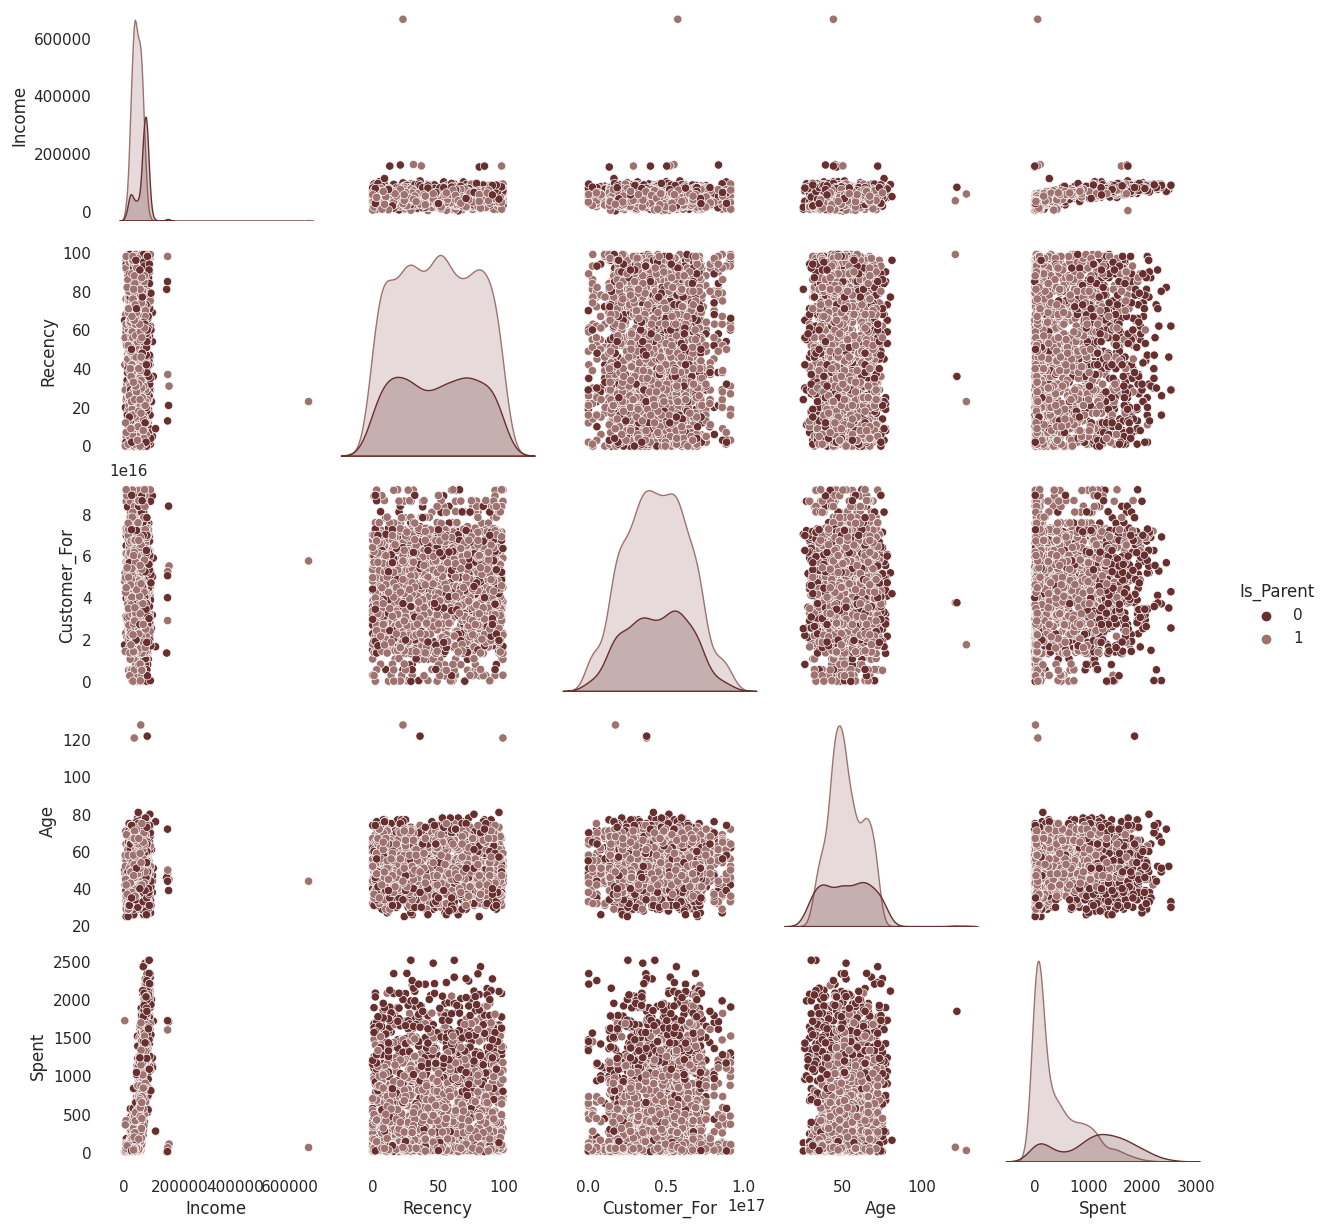

In [55]:
# To plot some selected features
# Setting up color preferences
sns.set(rc={"axes.facecolor": "white", "figure.facecolor": "white"})
pallet = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])

# Plotting following features
To_Plot = ["Income", "Recency", "Customer_For", "Age", "Spent", "Is_Parent"]
print("Relative Plot Of Some Selected Features: A Data Subset")
plt.figure()
sns.pairplot(Data[To_Plot], hue="Is_Parent", palette=["#682F2F", "#9E726F", "#D6B2B1"])
# Taking hue
plt.show()

2) DATA CLEANING (OUTLIER FLITERING - NO MISSING ROWS)

In [18]:
def boxplots_custom(dataset, columns_list, rows, cols, suptitle,size=(20,16)):
    fig, axs = plt.subplots(rows, cols,  figsize=size)
    fig.suptitle(suptitle,y=0.93, size=16)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        if i % cols == 0:
            axs[i].set_ylabel('Values')
        sns.boxplot( data=dataset[data], orient='v', ax=axs[i])
        axs[i].set_title(data)

In [19]:
numCols2 = Data.select_dtypes("number").columns
catCols2 = Data.select_dtypes("object").columns
numCols2= list(set(numCols2))
catCols2= list(set(catCols2))

Data_num=Data[numCols2]
Data_cat=Data[catCols2]

pd.Series(list(map(set,Data_cat.values.T)),index=Data_cat.columns)

Living_With                           {Alone, Partner}
Education      {Undergraduate, Postgraduate, Graduate}
dtype: object

In [20]:
Data.head(10)
Data[numCols2].describe()

Wines  AcceptedCmp1  NumDealsPurchases  NumWebVisitsMonth  \
count  2216.000000   2216.000000        2216.000000        2216.000000   
mean    305.091606      0.064079           2.323556           5.319043   
std     337.327920      0.244950           1.923716           2.425359   
min       0.000000      0.000000           0.000000           0.000000   
25%      24.000000      0.000000           1.000000           3.000000   
50%     174.500000      0.000000           2.000000           6.000000   
75%     505.000000      0.000000           3.000000           7.000000   
max    1493.000000      1.000000          15.000000          20.000000   

               Age  AcceptedCmp2  AcceptedCmp4         Gold        Spent  \
count  2216.000000   2216.000000   2216.000000  2216.000000  2216.000000   
mean     52.179603      0.013538      0.074007    43.965253   607.075361   
std      11.985554      0.115588      0.261842    51.815414   602.900476   
min      25.000000      0.000000      0.000000     0.000000     5.000000   
25%      44.000000      0.000000      0.000000     9.000000    69.000000   
50%      51.000000      0.000000      0.000000    24.500000   396.500000   
75%      62.000000      0.000000      0.000000    56.000000  1048.000000   
max     128.000000      1.000000      1.000000   321.000000  2525.000000   

          Complain  ...  AcceptedCmp5  NumWebPurchases         Meat  \
count  2216.000000  ...   2216.000000      2216.000000  2216.000000   
mean      0.009477  ...      0.073105         4.085289   166.995939   
std       0.096907  ...      0.260367         2.740951   224.283273   
min       0.000000  ...      0.000000         0.000000     0.000000   
25%       0.000000  ...      0.000000         2.000000    16.000000   
50%       0.000000  ...      0.000000         4.000000    68.000000   
75%       0.000000  ...      0.000000         6.000000   232.250000   
max       1.000000  ...      1.000000        27.000000  1725.000000   

       AcceptedCmp3  NumCatalogPurchases       Sweets     Children  \
count   2216.000000          2216.000000  2216.000000  2216.000000   
mean       0.073556             2.671029    27.028881     0.947202   
std        0.261106             2.926734    41.072046     0.749062   
min        0.000000             0.000000     0.000000     0.000000   
25%        0.000000             0.000000     1.000000     0.000000   
50%        0.000000             2.000000     8.000000     1.000000   
75%        0.000000             4.000000    33.000000     1.000000   
max        1.000000            28.000000   262.000000     3.000000   

          Teenhome         Fish  NumStorePurchases  
count  2216.000000  2216.000000        2216.000000  
mean      0.505415    37.637635           5.800993  
std       0.544181    54.752082           3.250785  
min       0.000000     0.000000           0.000000  
25%       0.000000     3.000000           3.000000  
50%       0.000000    12.000000           5.000000  
75%       1.000000    50.000000           8.000000  
max       2.000000   259.000000          13.000000  

[8 rows x 28 columns]

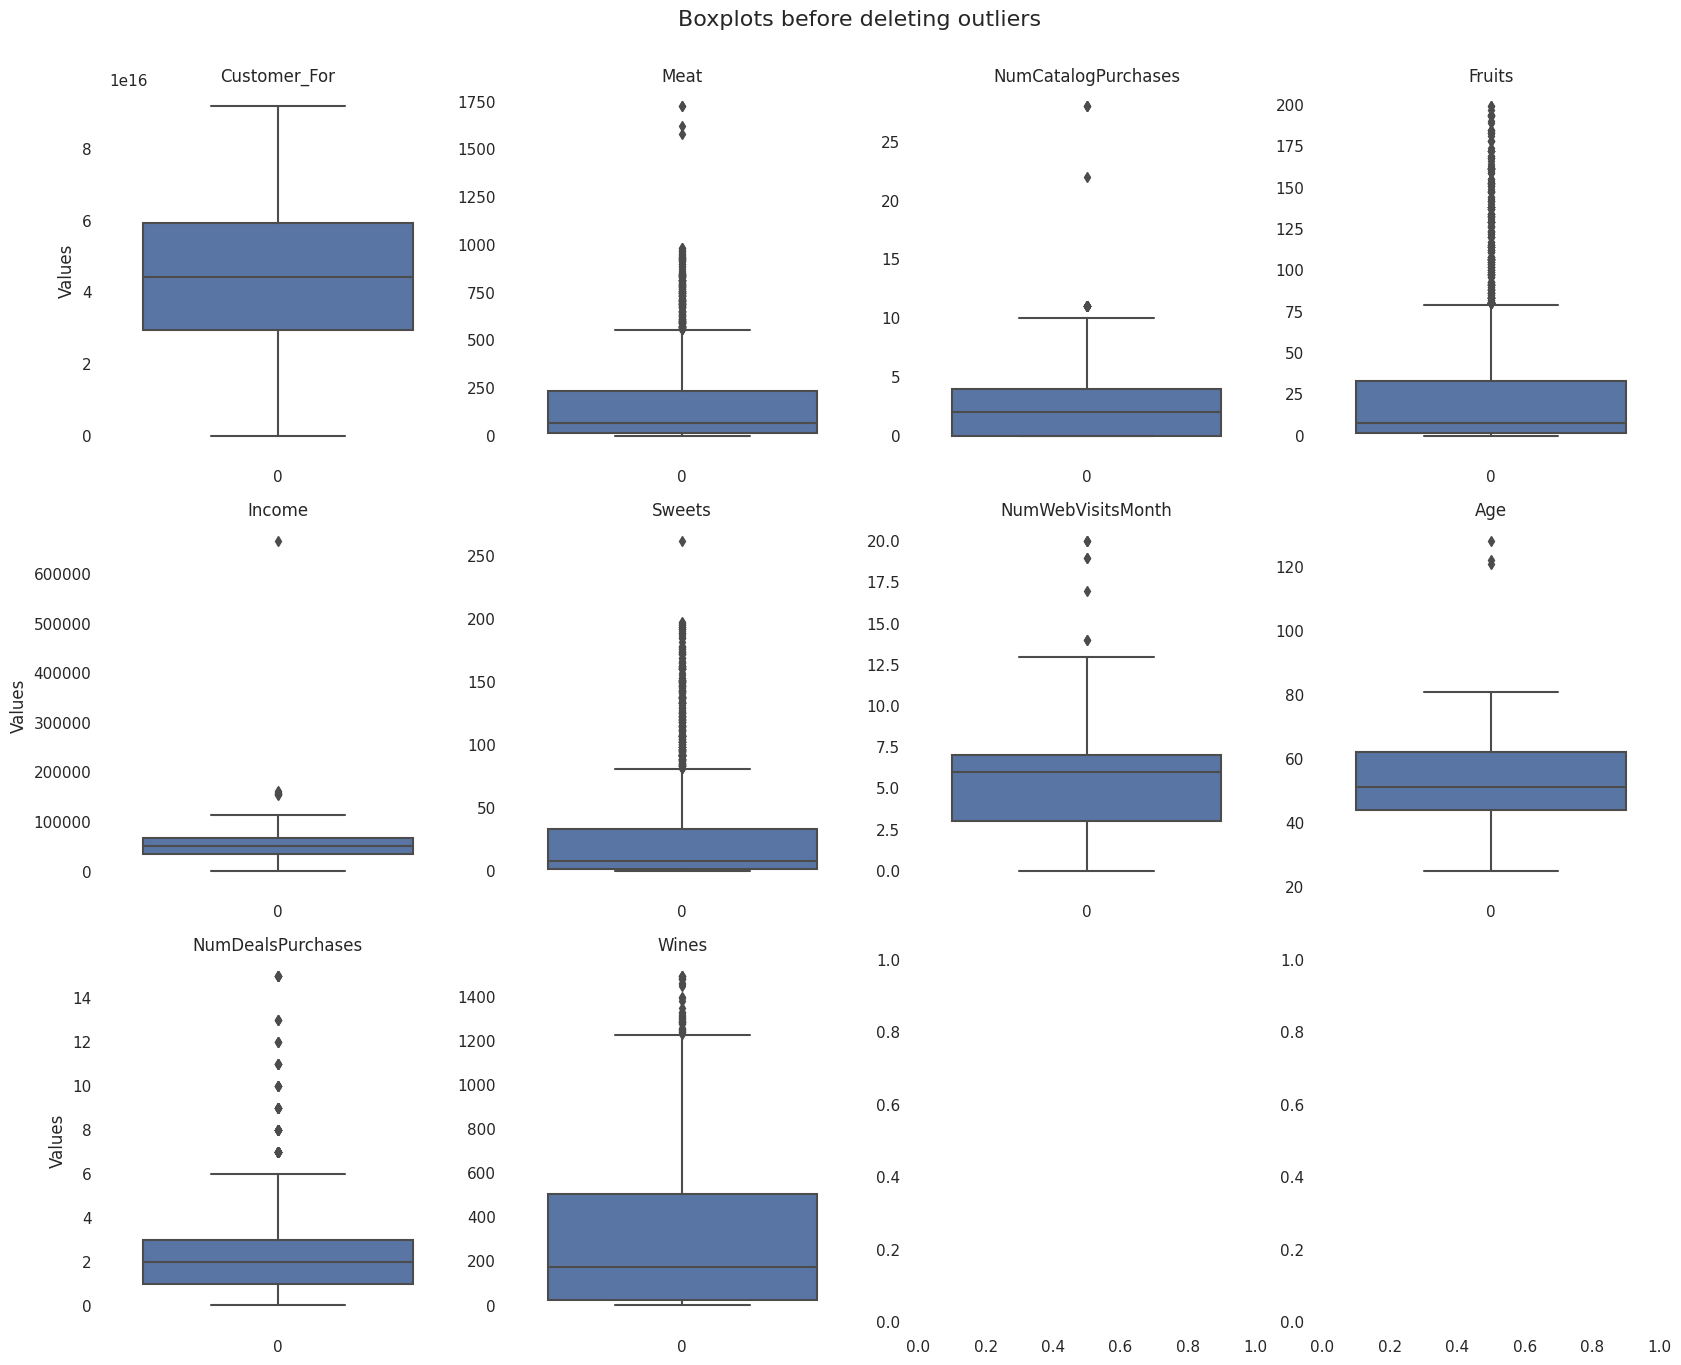

In [21]:
DataNum_selected=['Customer_For','Meat', 'NumCatalogPurchases','Fruits', 'Income', 'Sweets',
                   'NumWebVisitsMonth', 'Age', 'NumDealsPurchases',
                   'Wines']

boxplots_custom(dataset=Data, columns_list=Data[DataNum_selected], rows=3, cols=4, suptitle='Boxplots before deleting outliers')

In [22]:
numeric_columns_to_filter = ['Meat', 'NumCatalogPurchases','Fruits', 'Income', 'Sweets',
                   'Age', 'NumDealsPurchases',
                   'Wines']
Q1 = Data[numeric_columns_to_filter].quantile(0.0)
Q3 = Data[numeric_columns_to_filter].quantile(0.90)
IQR = Q3 - Q1
print('Here we will get IQR for each column\n',IQR)

Data_filtered = Data[~((Data[numeric_columns_to_filter] < (Q1 - 1.5 * IQR)) |(Data[numeric_columns_to_filter] > (Q3 + 1.5 * IQR))).any(axis=1)]
display(Data.shape)
display(Data_filtered.shape)

Here we will get IQR for each column
 Meat                     499.5
NumCatalogPurchases        7.0
Fruits                    83.0
Income                 78114.0
Sweets                    89.0
Age                       44.0
NumDealsPurchases          5.0
Wines                    823.0
dtype: float64


(2216, 30)

(2203, 30)

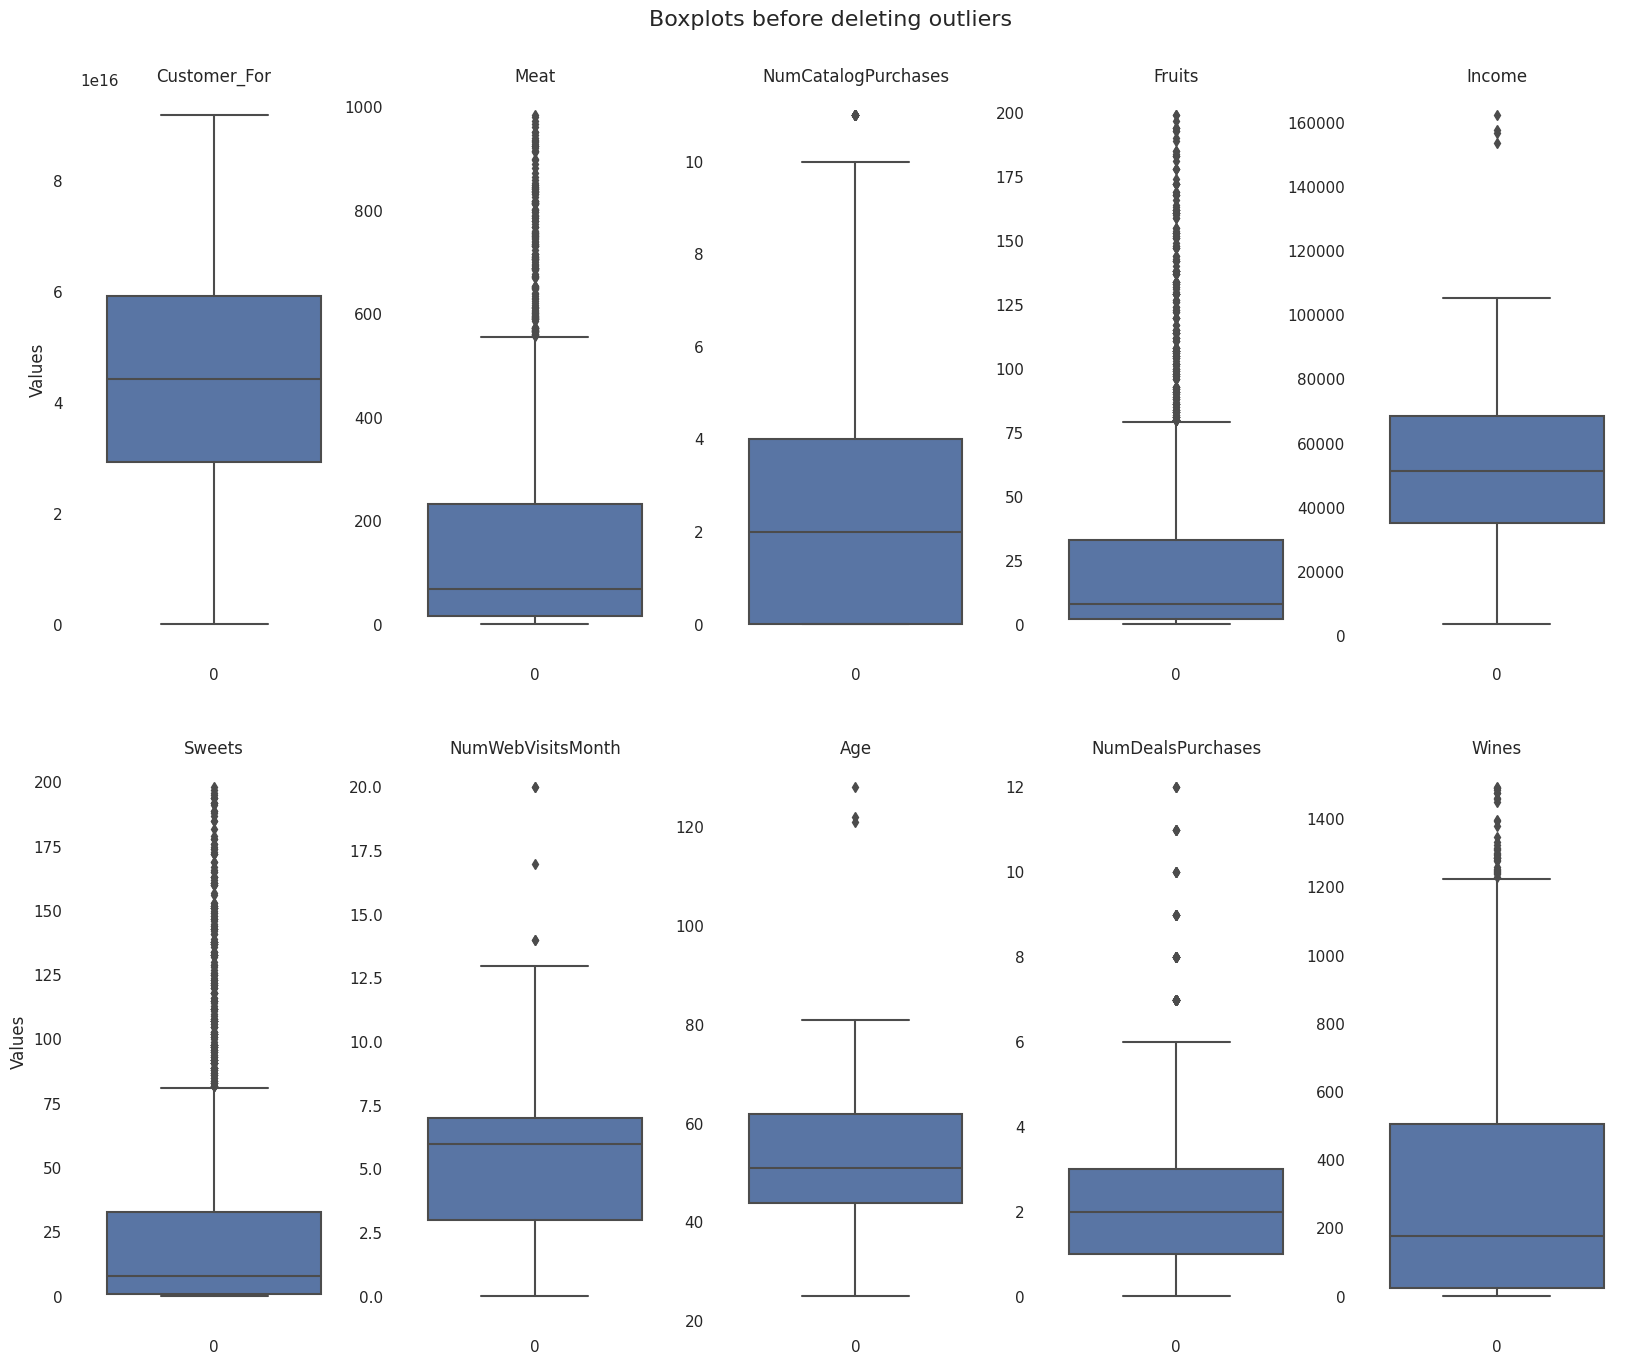

In [23]:
DataNum_selected=['Customer_For','Meat', 'NumCatalogPurchases','Fruits', 'Income', 'Sweets',
                   'NumWebVisitsMonth', 'Age', 'NumDealsPurchases',
                   'Wines']

boxplots_custom(dataset=Data_filtered, columns_list=Data[DataNum_selected], rows=2, cols=5, suptitle='Boxplots before deleting outliers')

In [24]:
# DROP AGE VALUES MORE THAN 90 SINCE AGE STILL SHOWS AN OUTLIER
Data_filtered = Data_filtered[(Data_filtered["Age"]<90)]

<Axes: xlabel='Age'>

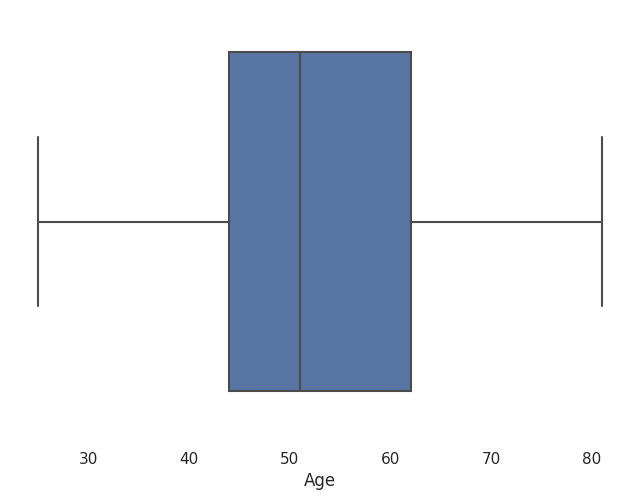

In [25]:
sns.boxplot(x=Data_filtered["Age"])


3) DETAILED EDA

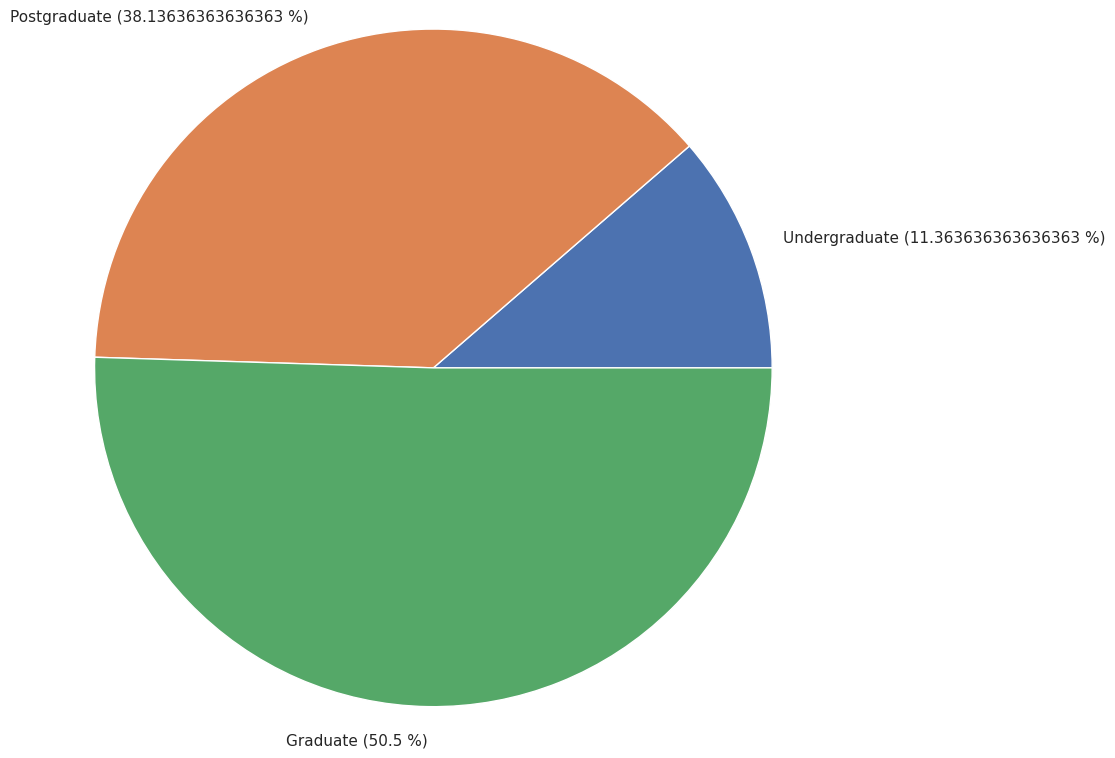

In [26]:
l,a = list(set(Data_filtered["Education"])),[]
for i in range(len(l)):
    a.append(Data_filtered["Education"].to_list().count(l[i]))
    l[i] = l[i]+" ("+str(a[i]*100/len(Data_filtered["Education"])) + " %)"
plt.pie(a,labels=l, radius=2)
plt.show()

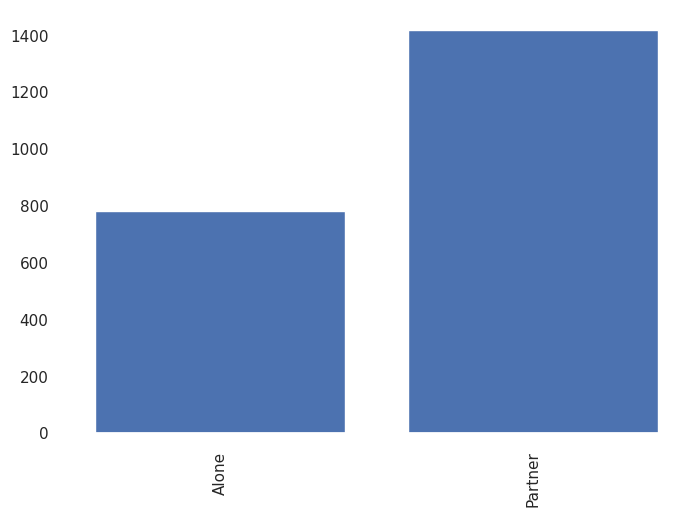

In [27]:
l,a = list(set(Data_filtered["Living_With"])),[]
for i in range(len(l)):
    a.append(Data_filtered["Living_With"].to_list().count(l[i]))
plt.bar(x=range(len(l)),height = a)
plt.xticks(labels=l,ticks=range(len(l)), rotation=90)
plt.show()

<Axes: ylabel='Density'>

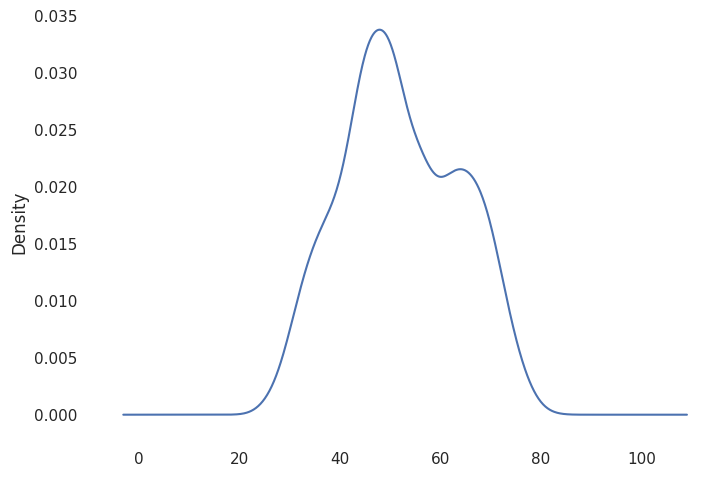

In [28]:
Data_filtered['Age'].plot(kind='kde')


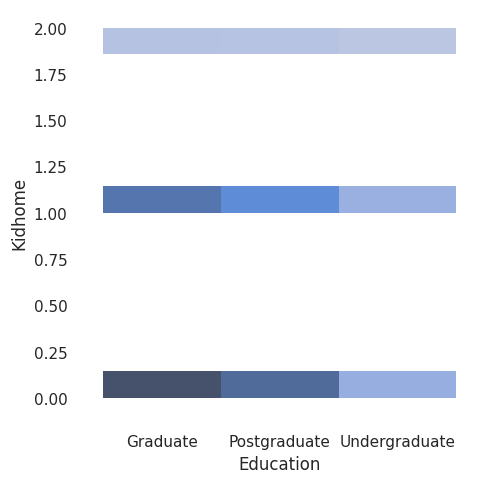

In [29]:
sns.displot(data=Data_filtered,y="Kidhome",x="Education")

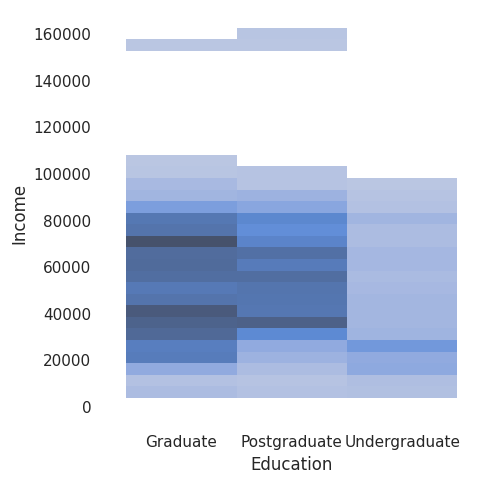

In [30]:
sns.displot(data=Data_filtered, x="Education", y="Income")

<Axes: >

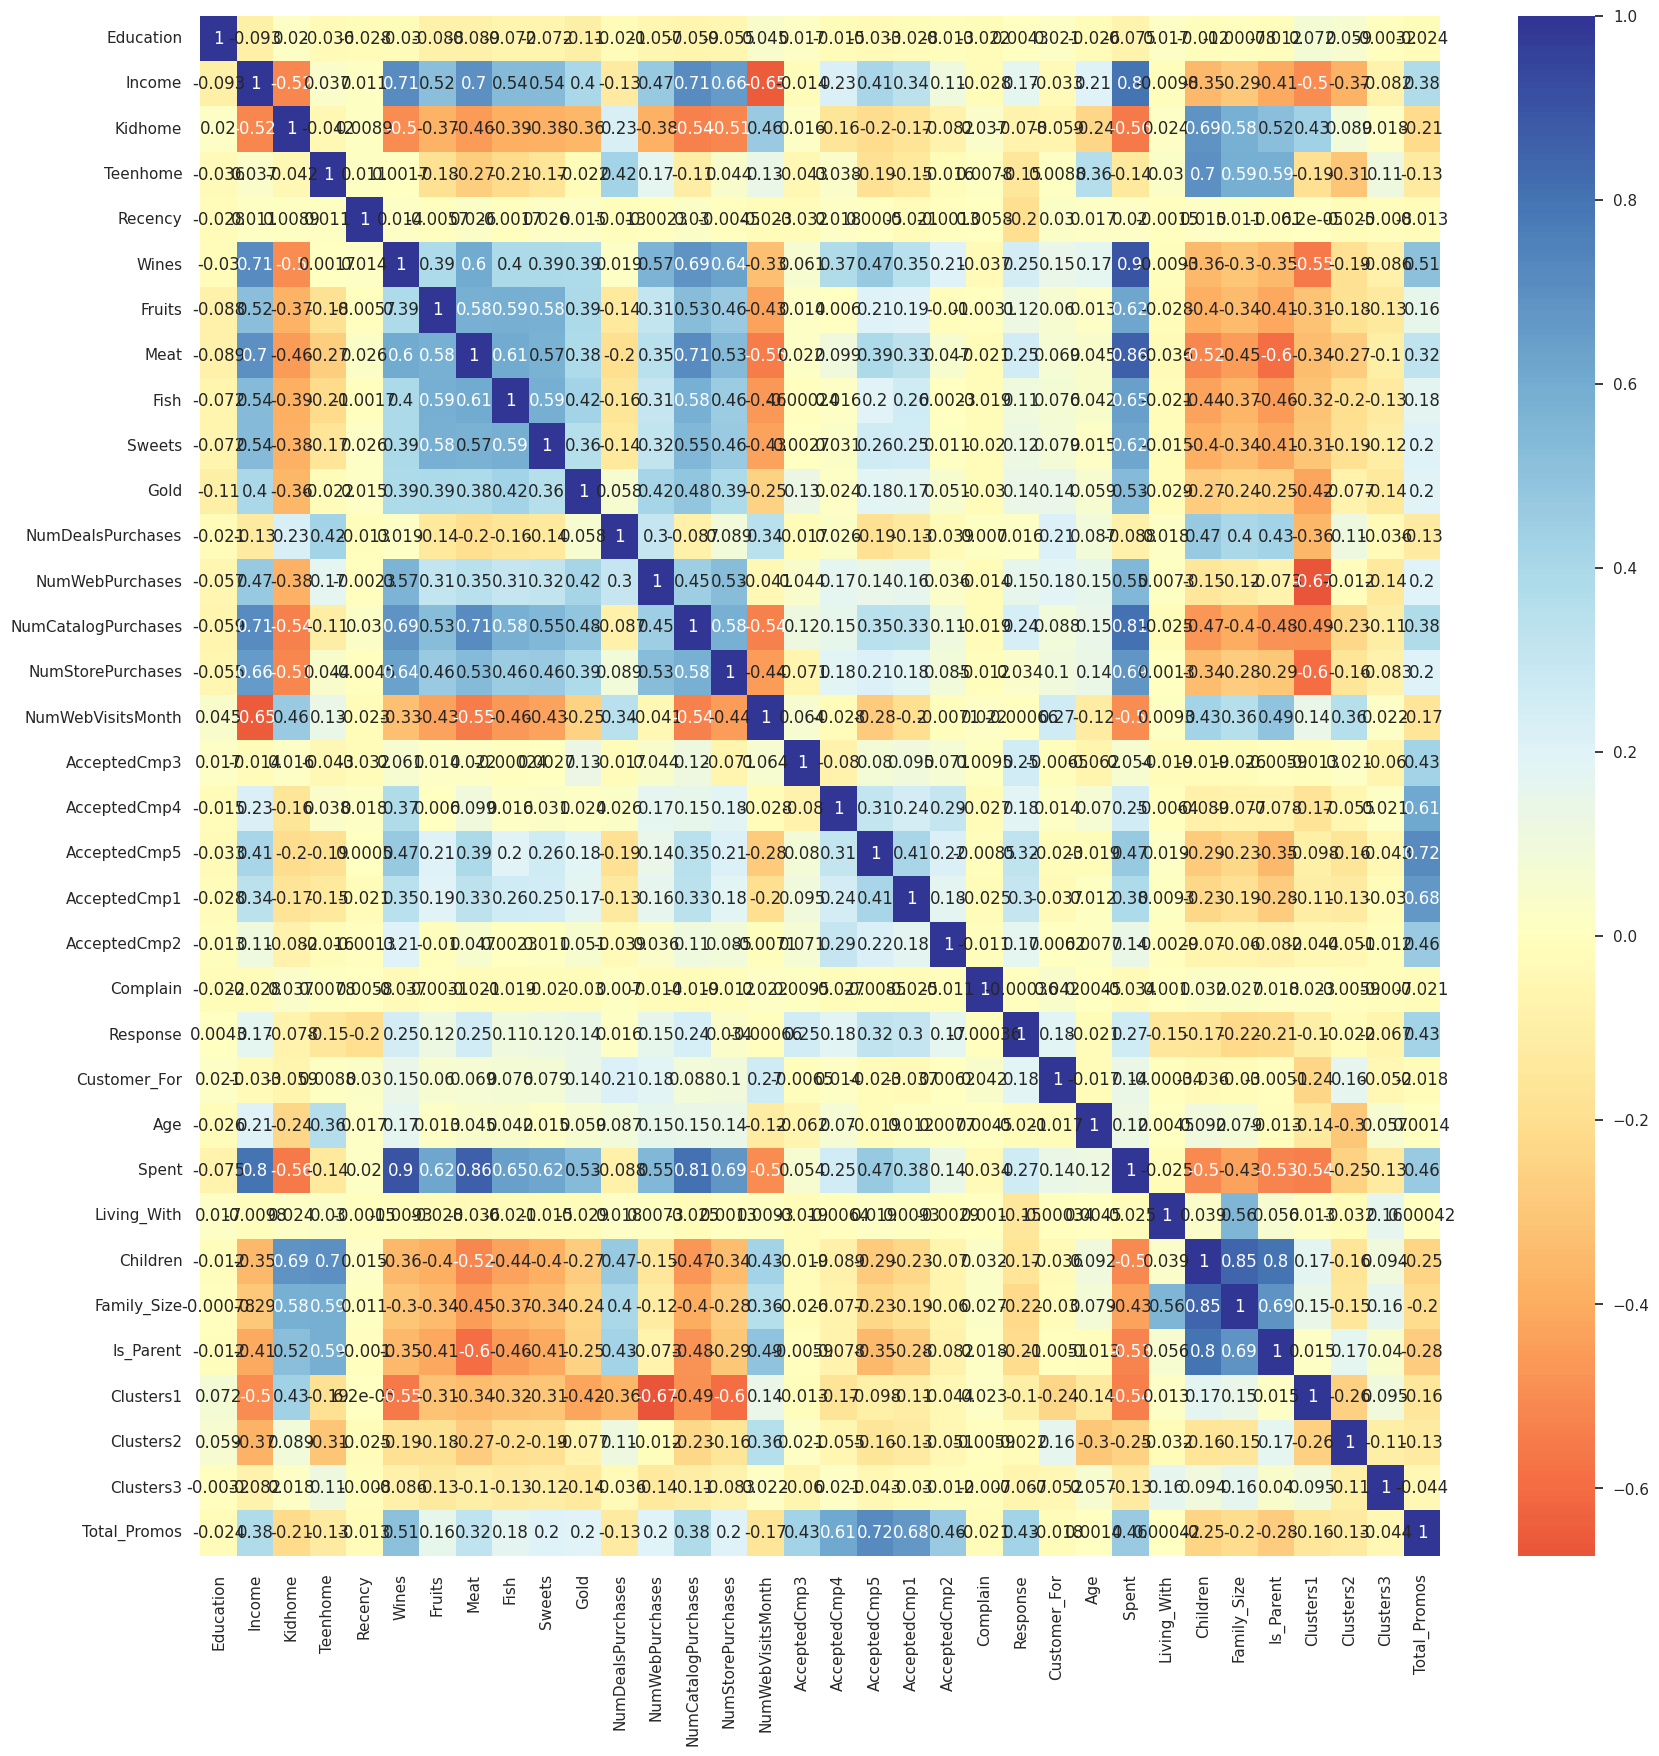

In [58]:
# Correlation matrix
corrmat = Data_filtered.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corrmat, annot=True, cmap='RdYlBu', center=0)

4) FEATURE ENGINEERING (ENCODING - SCALING - DIMENSIONALITY REDUCTION)

In [32]:
#Get list of categorical variables
s = (Data_filtered.dtypes == 'object')
object_cols = list(s[s].index)
s2 = (Data.dtypes == 'object')
object_cols2 = list(s2[s2].index)

print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['Education', 'Living_With']


In [33]:
#Label Encoding the object dtypes.
LE=LabelEncoder()
for i in object_cols:
    Data_filtered[i]=Data_filtered[[i]].apply(LE.fit_transform)
for i in object_cols2:
    Data[i]=Data[[i]].apply(LE.fit_transform)

print("All features are now numerical")

All features are now numerical


In [34]:
#Creating a copy of data
ds = Data_filtered.copy()
# creating a subset of dataframe by dropping the features on deals accepted and promotions
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
ds = ds.drop(cols_del, axis=1)
#Scaling
scaler = StandardScaler()
DataT=scaler.fit_transform(ds)
scaled_ds = pd.DataFrame(DataT,columns= ds.columns )
print("All features are now scaled")

All features are now scaled


In [35]:
#Scaled data to be used for reducing the dimensionality
print("Dataframe to be used for further modelling:")
scaled_ds.head()

Dataframe to be used for further modelling:


Education    Income   Kidhome  Teenhome   Recency     Wines    Fruits  \
0  -0.892096  0.297813 -0.821891 -0.929363  0.311334  0.974537  1.546929   
1  -0.892096 -0.261770  1.040271  0.907653 -0.379891 -0.873812 -0.638164   
2  -0.892096  0.937153 -0.821891 -0.929363 -0.794626  0.355459  0.567405   
3  -0.892096 -1.196369  1.040271 -0.929363 -0.794626 -0.873812 -0.562816   
4   0.573633  0.305167  1.040271 -0.929363  1.555539 -0.393952  0.416709   

       Meat      Fish    Sweets  ...  NumCatalogPurchases  NumStorePurchases  \
0  1.770472  2.457561  1.500871  ...             2.681125          -0.562332   
1 -0.736170 -0.651939 -0.636196  ...            -0.594188          -1.180743   
2 -0.174496  1.341799 -0.144916  ...            -0.230264           1.292900   
3 -0.671183 -0.505610 -0.587068  ...            -0.958112          -0.562332   
4 -0.216274  0.152873  0.002468  ...             0.133659           0.056079   

   NumWebVisitsMonth  Customer_For       Age     Spent  Living_With  Children  \
0           0.715068      1.977445  1.017394  1.681448    -1.347925 -1.265906   
1          -0.131166     -1.666186  1.273871 -0.961637    -1.347925  1.406832   
2          -0.554283     -0.171694  0.333458  0.283439     0.741881 -1.265906   
3           0.291951     -1.924599 -1.290891 -0.918417     0.741881  0.070463   
4          -0.131166     -0.822035 -1.034415 -0.305022     0.741881  0.070463   

   Family_Size  Is_Parent  
0    -1.761661  -1.583910  
1     0.451102   0.631349  
2    -0.655279  -1.583910  
3     0.451102   0.631349  
4     0.451102   0.631349  

[5 rows x 23 columns]

In [36]:
#Initiating PCA to reduce dimentions aka features to 3
pca = PCA(n_components=3)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

count          mean       std       min       25%       50%       75%  \
col1  2200.0  1.679465e-16  2.911325 -5.322806 -2.566036 -0.795059  2.424478   
col2  2200.0 -6.459479e-18  1.722945 -4.322988 -1.348467 -0.177570  1.241425   
col3  2200.0  4.844610e-18  1.224549 -3.641977 -0.841410 -0.018346  0.825941   

           max  
col1  7.531165  
col2  6.266346  
col3  3.792258

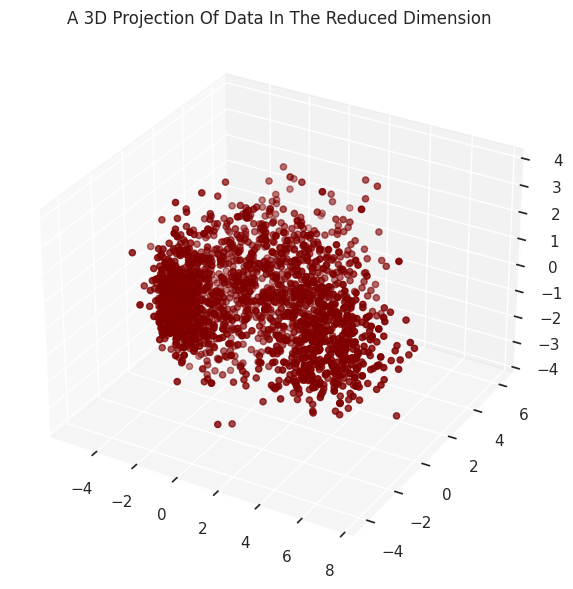

In [37]:
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]
#To plot
fig = plt.figure(figsize=(8,7))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

5) TESTING DIFFERENT CLUSTERING METHODS

Elbow Method to determine the number of clusters to be formed:


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

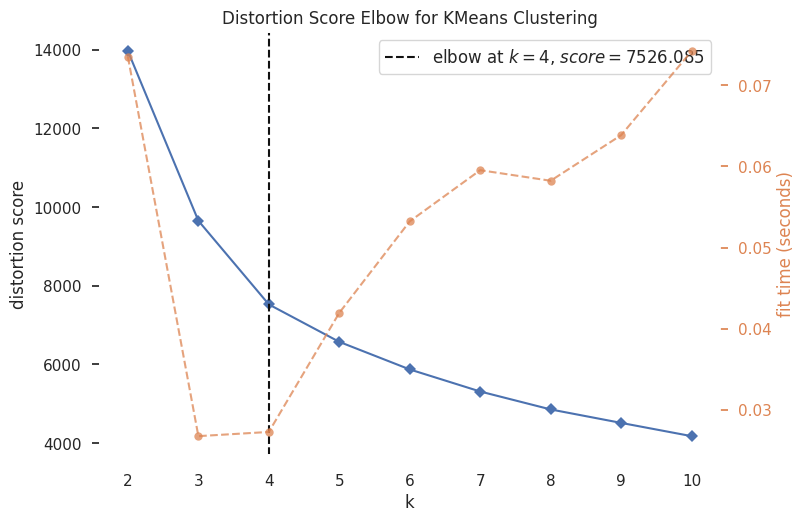

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [38]:
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

In [39]:
#Initiating the Agglomerative Clustering model
AC = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters1"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
Data_filtered["Clusters1"]= yhat_AC

In [40]:
from sklearn.cluster import KMeans
### BEGIN SOLUTION
km = KMeans(n_clusters=4, random_state=42)
yhat_KM = km.fit_predict(PCA_ds)
PCA_ds["Clusters2"] = yhat_KM
#Adding the Clusters feature to the orignal dataframe.
Data_filtered["Clusters2"]= yhat_KM

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


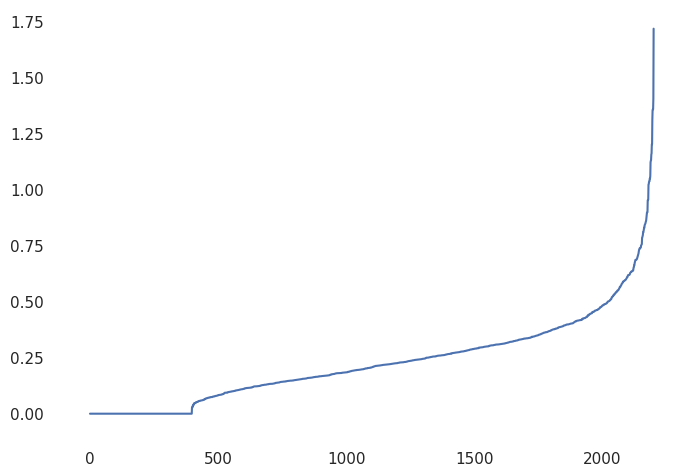

In [41]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(PCA_ds)
distances, indices = nbrs.kneighbors(PCA_ds)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [42]:

from sklearn.cluster import DBSCAN
db = DBSCAN(eps=1, min_samples=20)
db.fit_predict(PCA_ds)

from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.6, min_samples=20)
yhat_MS=db.fit_predict(PCA_ds)
PCA_ds["Clusters3"]=yhat_MS
Data_filtered["Clusters3"]=yhat_MS
PCA_ds[["Clusters3","Clusters2","Clusters1"]]


Clusters3  Clusters2  Clusters1
0            -1          1          1
1             2          0          3
2            -1          1          1
3             0          3          2
4             3          2          0
...         ...        ...        ...
2195         -1          2          0
2196         -1          2          0
2197         -1          1          1
2198         -1          2          0
2199         -1          2          0

[2200 rows x 3 columns]

In [43]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
score = silhouette_score(PCA_ds, PCA_ds['Clusters2'], metric='euclidean')
print('Silhouetter Score: %.3f' % score)


Silhouetter Score: 0.396


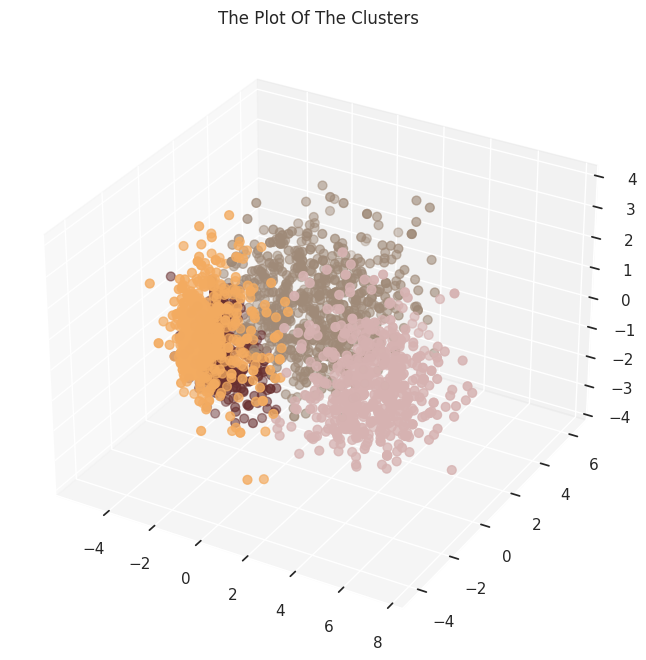

In [44]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters2"], marker='o', cmap = cmap )
ax.set_title("The Plot Of The Clusters")
plt.show()

6) CUSTOMER SEGMENTATION AND PROFILING

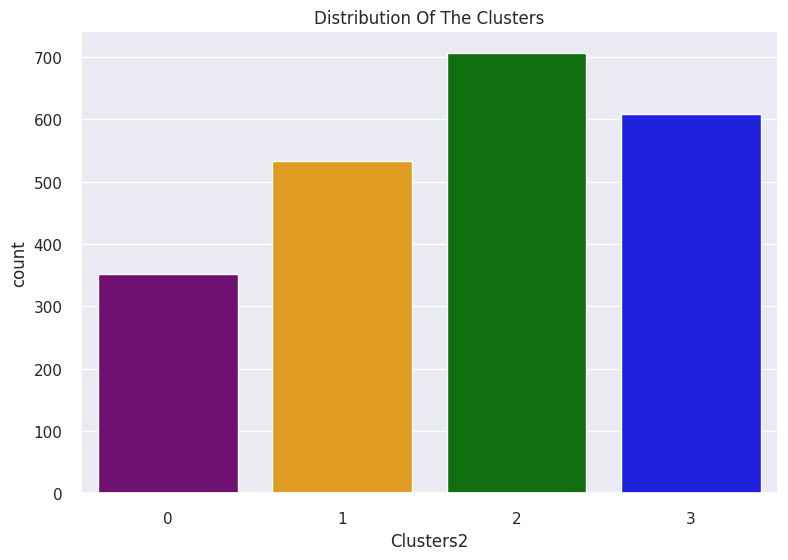

In [53]:
custom_palette = ["purple", "orange", "green", "blue", "red"]
#Plotting countplot of clusters
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=Data_filtered["Clusters2"], palette= custom_palette)
pl.set_title("Distribution Of The Clusters")
plt.show()

<ipython-input-52-21c9c4253135>:3: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  pl = sns.scatterplot(data = Data_filtered,x=Data_filtered["Spent"], y=Data_filtered["Income"],hue=Data_filtered["Clusters2"], palette= custom_palette)


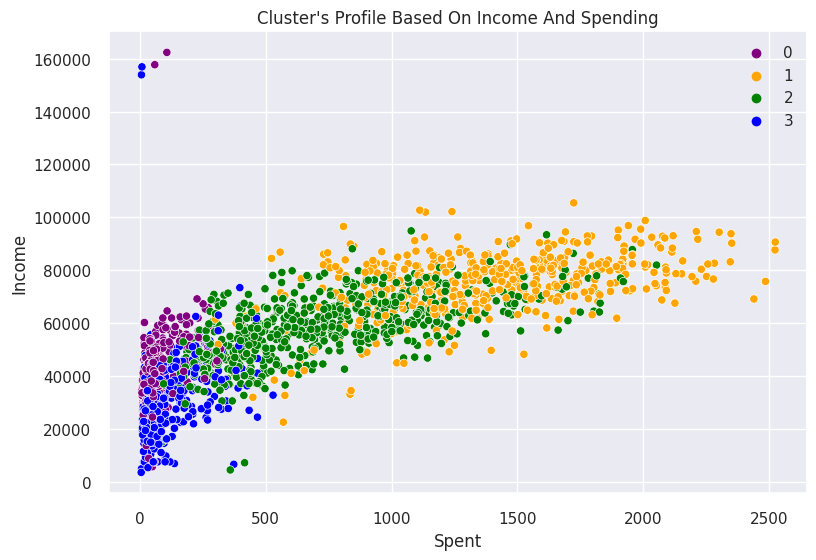

In [52]:
custom_palette = ["purple", "orange", "green", "blue", "red"]

pl = sns.scatterplot(data = Data_filtered,x=Data_filtered["Spent"], y=Data_filtered["Income"],hue=Data_filtered["Clusters2"], palette= custom_palette)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

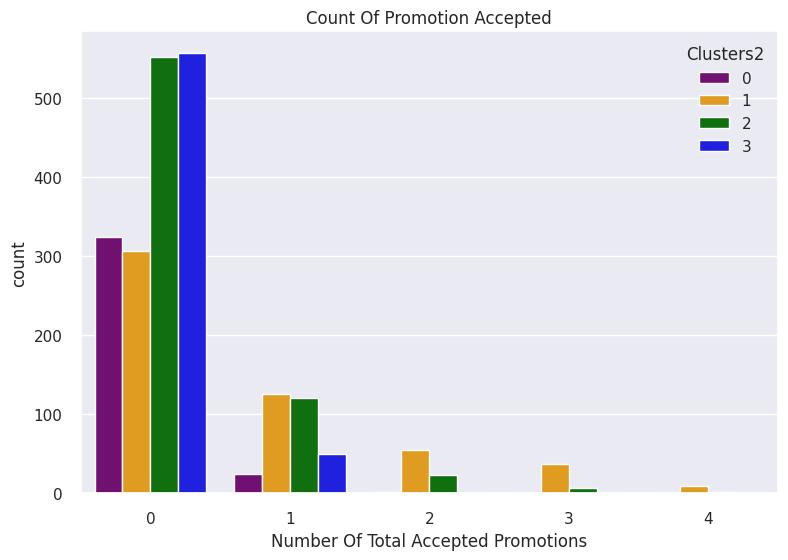

In [51]:
# Creating a feature to get a sum of accepted promotions
Data_filtered["Total_Promos"] = Data_filtered["AcceptedCmp1"] + Data_filtered["AcceptedCmp2"] + Data_filtered["AcceptedCmp3"] + Data_filtered["AcceptedCmp4"] + Data_filtered["AcceptedCmp5"]

# Define your desired color palette
custom_palette = ["purple", "orange", "green", "blue", "red"]

# Plotting count of total campaign accepted
plt.figure()
pl = sns.countplot(x=Data_filtered["Total_Promos"], hue=Data_filtered["Clusters2"], palette=custom_palette)
sns.set(rc={"figure.figsize":(9, 6)})
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 61.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 13.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 66.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 66.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 5.4% of the points cannot be place

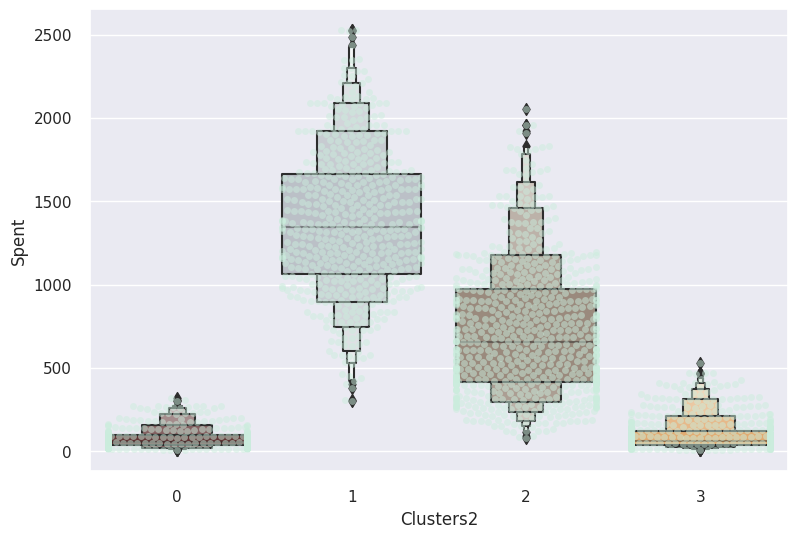

In [48]:
plt.figure()
pl=sns.swarmplot(x=Data_filtered["Clusters2"], y=Data_filtered["Spent"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=Data_filtered["Clusters2"], y=Data_filtered["Spent"], palette=pal)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1826: UserWarning: The palette list has more values (9) than needed (4), which may not be intended.
  func(x=self.x, y=self.y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1877: UserWarning: The palette list has more values (9) than needed (4), which may not be intended.
  func(x=self.x, ax=self.ax_marg_x, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1883: UserWarning: The palette list has more values (9) than needed (4), which may not be intended.
  func(y=self.y, ax=self.ax_marg_y, **kwargs)


<Figure size 900x600 with 0 Axes>

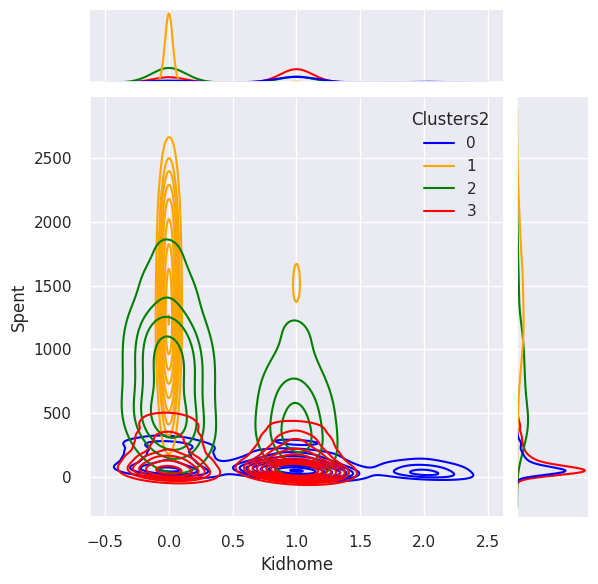

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1826: UserWarning: The palette list has more values (9) than needed (4), which may not be intended.
  func(x=self.x, y=self.y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1877: UserWarning: The palette list has more values (9) than needed (4), which may not be intended.
  func(x=self.x, ax=self.ax_marg_x, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1883: UserWarning: The palette list has more values (9) than needed (4), which may not be intended.
  func(y=self.y, ax=self.ax_marg_y, **kwargs)


<Figure size 900x600 with 0 Axes>

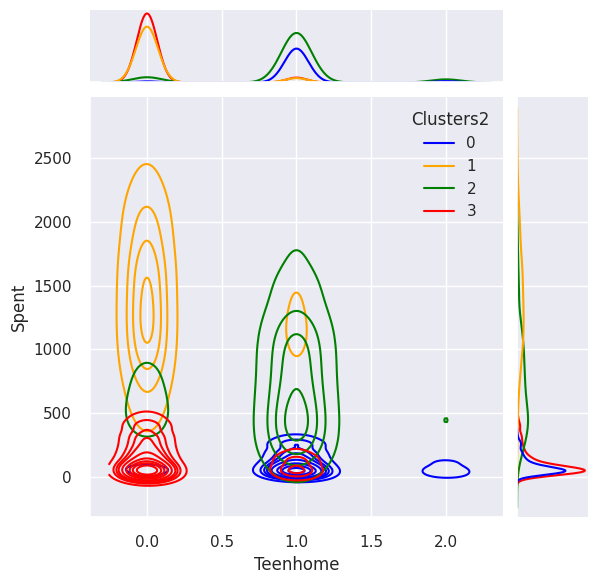

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1826: UserWarning: The palette list has more values (9) than needed (4), which may not be intended.
  func(x=self.x, y=self.y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1877: UserWarning: The palette list has more values (9) than needed (4), which may not be intended.
  func(x=self.x, ax=self.ax_marg_x, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1883: UserWarning: The palette list has more values (9) than needed (4), which may not be intended.
  func(y=self.y, ax=self.ax_marg_y, **kwargs)


<Figure size 900x600 with 0 Axes>

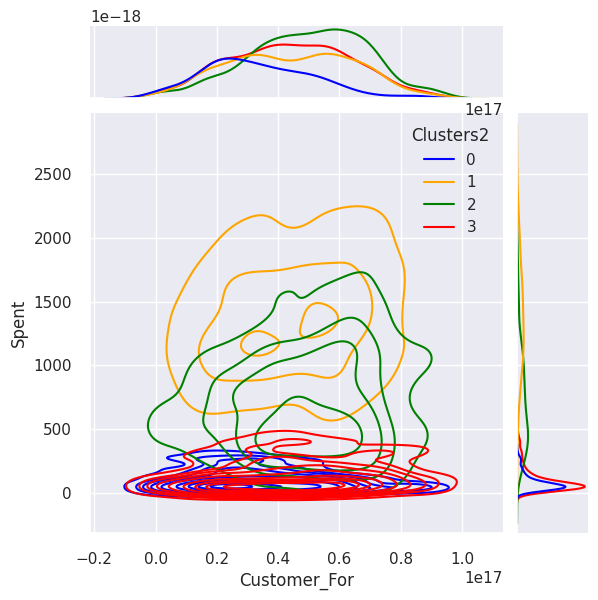

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1826: UserWarning: The palette list has more values (9) than needed (4), which may not be intended.
  func(x=self.x, y=self.y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1877: UserWarning: The palette list has more values (9) than needed (4), which may not be intended.
  func(x=self.x, ax=self.ax_marg_x, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1883: UserWarning: The palette list has more values (9) than needed (4), which may not be intended.
  func(y=self.y, ax=self.ax_marg_y, **kwargs)


<Figure size 900x600 with 0 Axes>

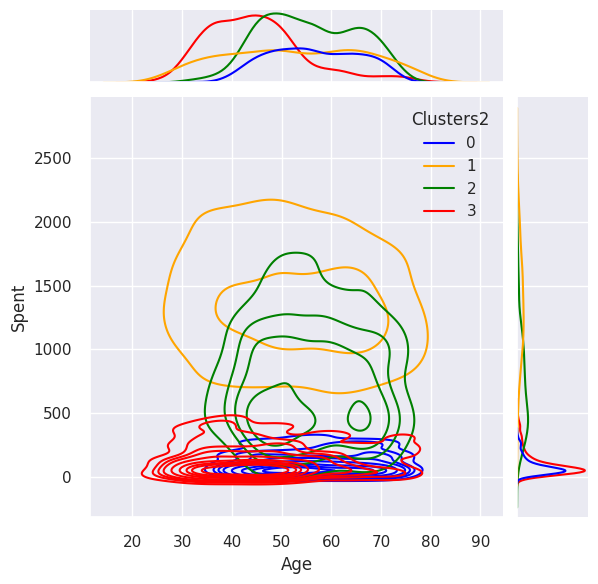

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1826: UserWarning: The palette list has more values (9) than needed (4), which may not be intended.
  func(x=self.x, y=self.y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1877: UserWarning: The palette list has more values (9) than needed (4), which may not be intended.
  func(x=self.x, ax=self.ax_marg_x, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1883: UserWarning: The palette list has more values (9) than needed (4), which may not be intended.
  func(y=self.y, ax=self.ax_marg_y, **kwargs)


<Figure size 900x600 with 0 Axes>

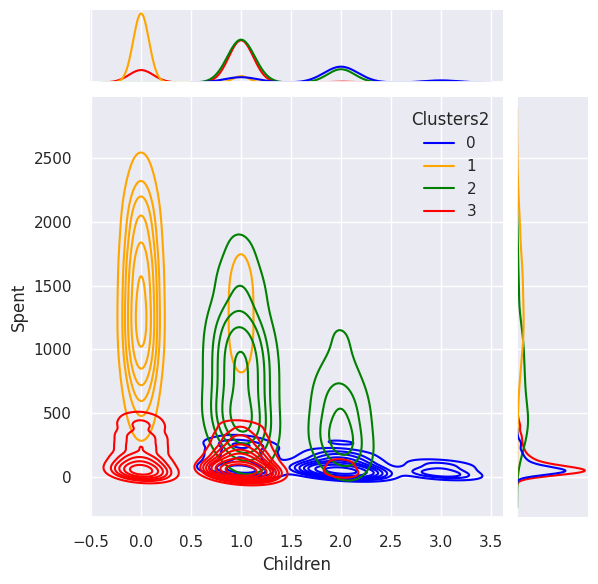

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1826: UserWarning: The palette list has more values (9) than needed (4), which may not be intended.
  func(x=self.x, y=self.y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1877: UserWarning: The palette list has more values (9) than needed (4), which may not be intended.
  func(x=self.x, ax=self.ax_marg_x, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1883: UserWarning: The palette list has more values (9) than needed (4), which may not be intended.
  func(y=self.y, ax=self.ax_marg_y, **kwargs)


<Figure size 900x600 with 0 Axes>

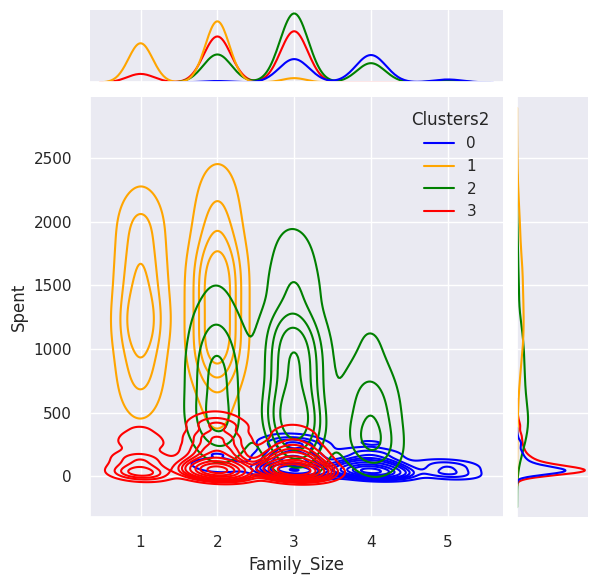

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1826: UserWarning: The palette list has more values (9) than needed (4), which may not be intended.
  func(x=self.x, y=self.y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1877: UserWarning: The palette list has more values (9) than needed (4), which may not be intended.
  func(x=self.x, ax=self.ax_marg_x, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1877: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(x=self.x, ax=self.ax_marg_x, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1883: UserWarning: The palette list has more values (9) than needed (4), which may not be intended.
  func(y=self.y, ax=self.ax_marg_y, **kwargs)


<Figure size 900x600 with 0 Axes>

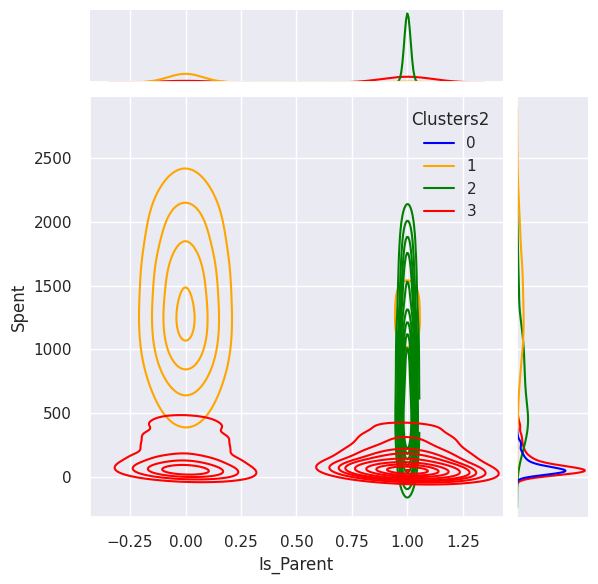

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1826: UserWarning: The palette list has more values (9) than needed (4), which may not be intended.
  func(x=self.x, y=self.y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1877: UserWarning: The palette list has more values (9) than needed (4), which may not be intended.
  func(x=self.x, ax=self.ax_marg_x, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1883: UserWarning: The palette list has more values (9) than needed (4), which may not be intended.
  func(y=self.y, ax=self.ax_marg_y, **kwargs)


<Figure size 900x600 with 0 Axes>

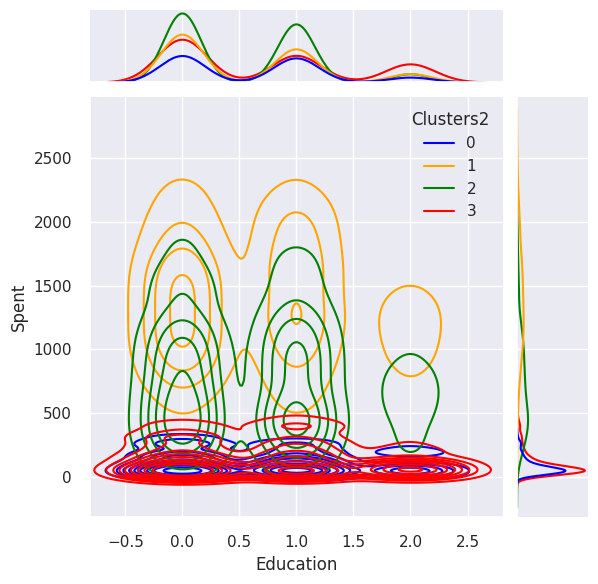

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1826: UserWarning: The palette list has more values (9) than needed (4), which may not be intended.
  func(x=self.x, y=self.y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1877: UserWarning: The palette list has more values (9) than needed (4), which may not be intended.
  func(x=self.x, ax=self.ax_marg_x, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1883: UserWarning: The palette list has more values (9) than needed (4), which may not be intended.
  func(y=self.y, ax=self.ax_marg_y, **kwargs)


<Figure size 900x600 with 0 Axes>

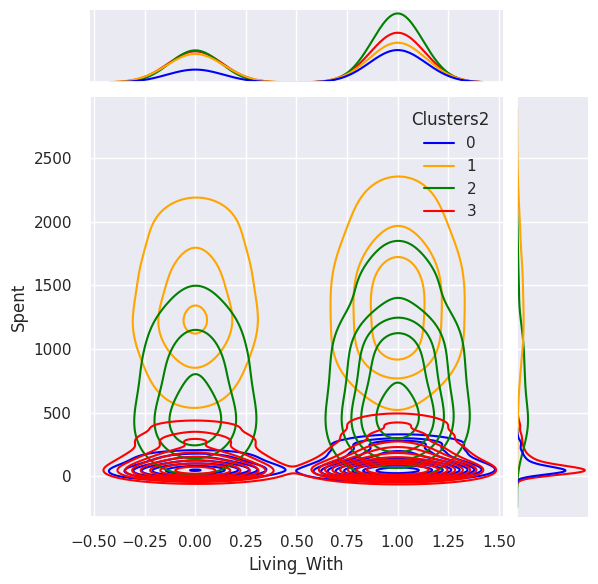

In [50]:


# Define your desired color palette
custom_palette = ["blue", "orange", "green", "red", "purple", "yellow", "pink", "brown", "gray"]

Personal = ["Kidhome", "Teenhome", "Customer_For", "Age", "Children", "Family_Size", "Is_Parent", "Education", "Living_With"]

# Iterate over the Personal variables and plot
for i in Personal:
    plt.figure()
    sns.jointplot(x=Data_filtered[i], y=Data_filtered["Spent"], hue=Data_filtered["Clusters2"], kind="kde", palette=custom_palette)
    plt.show()